# Spam Email Predictor 

Creator: Riley Cohen

Data: https://www.kaggle.com/itsbhups/98-accuracy-spam-ham-messages

In this project I will train a logistic regression model that will calssify whether an email is spam or not. 

In [1]:
#Basic libraries to get started
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

Read the data 

In [2]:
emails1 = pd.read_csv(r'/Users/rileycohen/Downloads/spam_ham_dataset.csv')
emails1.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


The first two columns are not needed, so I am going to drop them.

In [3]:
emails1 = emails1.drop(columns = ['Unnamed: 0', 'label']) 
emails1.columns = ['text', 'spam']
emails1.head(3)

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0


# Let's take a quick glance at the data

Check for missing values

In [4]:
emails1.isna().sum() 

text    0
spam    0
dtype: int64

Let's take a look at the first few ham and spam emails

In [5]:
ham = emails1.loc[emails1.spam == 0].text
spam = emails1.loc[emails1.spam == 1].text

print('*****ham*****')
for k in range(3):
    print(ham.iloc[k])
    print(' ')
    
  
print('******spam*******')
for k in range(3):
    print(spam.iloc[k])
    print(' ')

    


*****ham*****
Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
 
Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls
 
Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad an

At a quick glance, it appears that the spam emails are often trying to sell stuff.

# Let's start feature engineering. 

I will start by using Sklearn's CountVectorizer.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(emails1['text'])
print(X.shape)
print("Words:", list(enumerate(vectorizer.get_feature_names()))[0:10])

(5171, 50140)
Words: [(0, '00'), (1, '000'), (2, '0000'), (3, '000000'), (4, '000000000002858'), (5, '000000000049773'), (6, '000080'), (7, '000099'), (8, '0001'), (9, '00018')]


Below I have created the DataFrame named words. This dataframe contain each word and it's count in each email.

In [8]:
words = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
words.head()

,00,000,0000,000000,000000000002858,000000000049773,000080,000099,0001,00018,...,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's find the most common words to spam and ham emails.

In [9]:
spam_words = words.iloc[spam.index]
top_spam = spam_words.sum().sort_values(ascending = False)

ham_words = words.iloc[ham.index]
top_ham = ham_words.sum().sort_values(ascending = False)

In [10]:
top_ham

ect               13897
hou                7281
enron              6555
subject            6403
2000               4308
                  ...  
maggotadvances        0
maggot                0
magdalene             0
magallanes            0
immediatly            0
Length: 50140, dtype: int64

In [11]:
top_spam

subject      1657
com           992
http          983
company       728
www           587
             ... 
smtprs          0
fifth           0
smu             0
bprice          0
restoring       0
Length: 50140, dtype: int64

Now let's visualize the difference in the mean number of occurance in the top 10 spam/ham words by using a barplot.

In [12]:
topSH10 = pd.concat([emails1.spam,#Indicator of spam or ham
                   words[top_spam[0:10].index],  #top 10 spam
                   words[top_ham[0:10].index] ], #top 10 ham
                  axis = 1)
topSH10

,spam,subject,com,http,company,www,00,information,font,td,...,ect,hou,enron,subject,2000,gas,deal,com,meter,cc
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,2,2,0,0,0,0,0,0,0,...,0,0,2,2,2,0,0,2,0,1
5167,0,2,3,0,0,0,0,0,0,0,...,0,0,3,2,5,0,0,3,0,1
5168,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,3,0,0,0,0
5169,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,3,0,0,0,0,0


In [13]:
melt = topSH10.melt('spam') #Unpivot dataframe 
melt.head()

,spam,variable,value
0,0,subject,1
1,0,subject,1
2,0,subject,1
3,1,subject,1
4,0,subject,1


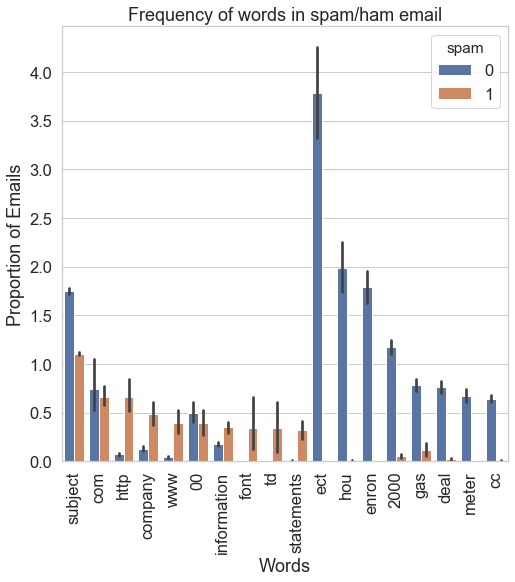

In [14]:
plt.figure(figsize = (8,8))
plt.xticks(rotation = 90); 
sns.barplot(x='variable', y='value', hue='spam',data = melt);
plt.ylabel('Proportion of Emails')
plt.xlabel('Words')
plt.title('Frequency of words in spam/ham email');

It looks the the most useful words in this predictor will be those in which the spam and hame words counts have a large enough difference between

Below I am going to define a new metric called relative difference which I will use to help me choose useful words for my model.

Relative difference = $\frac{\text{|spam_word_count  -  ham_word_count|}}{\text{spam_word_count  +  ham_word_count}}$

In [15]:
g1 = topSH10.groupby('spam').sum() #Group spam/ham and count number of occurances of each word 
g2 = abs(g1.iloc[0] - g1.iloc[1]) #Difference 
g3 = abs(g1.iloc[0] - g1.iloc[1])/(g1.iloc[0] + g1.iloc[1]) #Relative difference 
display(g2.head())
print('min difference:', g2.min(),'|',
      'mean difference:', g2.mean(),'|',
      'max difference:', g2.max()
     )
print('')
display(g3.head())
print('min relative difference:', g3.min(),'|',
      'mean relative difference:', g3.mean(),'|',
      'max relative difference:', g3.max()
     )
    

subject    4746
com        1725
http        731
company     261
www         418
dtype: int64

min difference: 114 | mean difference: 2968.4 | max difference: 13894



subject    0.588834
com        0.465085
http       0.591903
company    0.218410
www        0.552910
dtype: float64

min relative difference: 0.09878682842287695 | mean relative difference: 0.7398913318184872 | max relative difference: 1.0


Using these metrics and the plot above, I beleive it will be most useful to only use words that have a difference and relative difference larger than the mean relative difference. 

In [16]:
spam_counts = words.iloc[spam.index].sum()
ham_counts = words.iloc[ham.index].sum()
relative_distance = abs(spam_counts - ham_counts)/(spam_counts + ham_counts)

#The masks below are hyperparameters
mask1 = abs(spam_counts - ham_counts) > 100 #Counts differ by at least 100
mask2 = relative_distance > .74 #This is large enough relative to the total number of counts

relative_distance = relative_distance[mask1 & mask2]
relative_distance

000        0.767748
01         0.920847
02         0.950000
03         0.939444
04         0.919063
             ...   
windows    0.840000
wynne      1.000000
xls        1.000000
xp         1.000000
zero       0.917160
Length: 371, dtype: float64

In [17]:
good_words = words[relative_distance.index]
good_words.head()

,000,01,02,03,04,05,06,07,08,09,...,waha,wednesday,weissman,wellhead,width,windows,wynne,xls,xp,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now lets add acouple more features
- Word Count
- Character Count
- tfigs 

In [18]:
design1 = good_words.copy() #good words to use & character/word counts

In [19]:
#Character and word count
design1['character_count'] = emails1['text'].apply(len).reset_index().drop(columns =['index'])
design1['word_count'] = emails1['text'].str.split().str.len().reset_index().drop(columns =['index'])

Let's take a look at the distributions for spam and ham emails

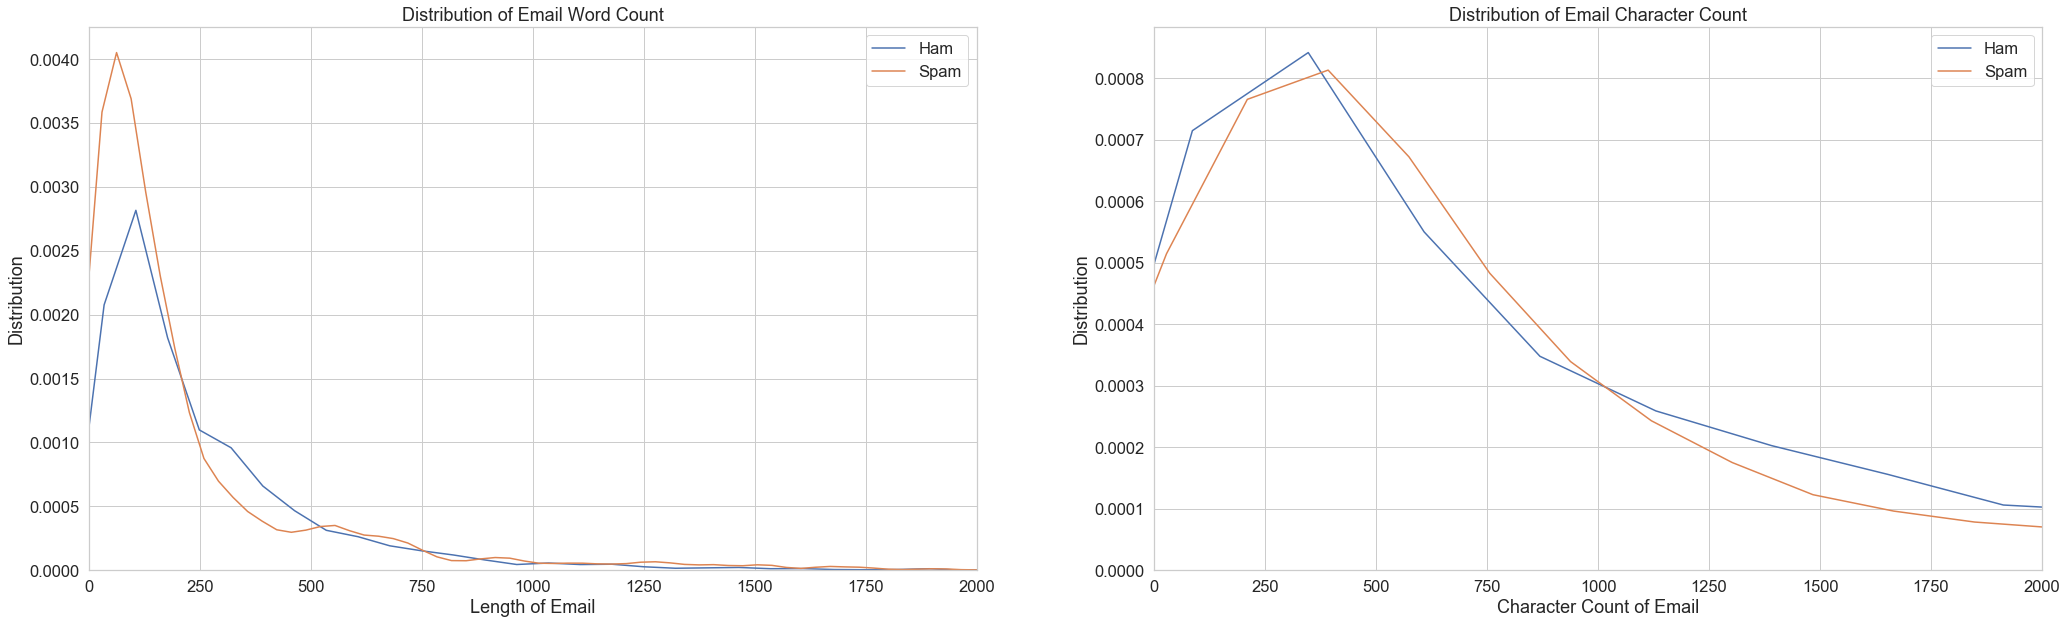

In [20]:
f,axes = plt.subplots(1,2,figsize=(35, 10))

plt.subplot(1,2,1)
df1 = design1.loc[emails1['spam'] == 0]
df2 = design1.loc[emails1['spam'] == 1]

sns.distplot(df1.word_count, label='Ham', hist=False)
sns.distplot(df2.word_count, label='Spam', hist=False)
plt.xlim([0,2000])
plt.ylabel('Distribution')
plt.xlabel('Length of Email')
plt.title('Distribution of Email Word Count')
plt.legend(['Ham','Spam']);


plt.subplot(1,2,2)
df1 = design1.loc[emails1['spam'] == 0]
df2 = design1.loc[emails1['spam'] == 1]

sns.distplot(df1.character_count, label='Ham', hist=False)
sns.distplot(df2.character_count, label='Spam', hist=False)

plt.xlim([0,2000])
plt.ylabel('Distribution')
plt.xlabel('Character Count of Email')
plt.title('Distribution of Email Character Count')
plt.legend(['Ham','Spam']);

Interesting the word count for ham emails is much less but it uses more special characters. I am going to do the same analysis above, but this time with special characters.

In [21]:
vectorizer2 = CountVectorizer(token_pattern = r'[^A-Za-z0-9]')
X = vectorizer2.fit_transform(emails1['text'])
print(X.shape)

(5171, 45)


In [22]:
special_characters = pd.DataFrame(X.toarray(), columns = vectorizer2.get_feature_names())
special_characters.head()

,,,,\n,\r,,,,,,...,[,\,],^,_,`,{,|,},~
0,0,0,0,5,5,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
1,0,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,9,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,10,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
spam_counts = special_characters.loc[emails1.spam == 1].sum()
ham_counts = special_characters.loc[emails1.spam == 0].sum()
relative_distance = abs(spam_counts - ham_counts)/(spam_counts + ham_counts)

mask1 = abs(spam_counts - ham_counts) > 100 #Counts differ by at least 100
mask2 = relative_distance > .74 #This is large enough relative to the total number of counts

relative_distance = relative_distance[mask1 & mask2]
special_characters = special_characters[relative_distance.index]
special_characters.head()

,,&,-,>,@,`
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,9,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [24]:
#design2 = pd.concat([special_characters, design1], axis = 1) #Includes special characters 
#design2.head()

Some useful function for standardizing the data and removing redundant features.

In [25]:
def redundant_features(df):
    '''
    Input: Dataframe
    Output: Dataframe without redundant features
    '''
    
    correlated_features = set()
    correlation_matrix = df.iloc[:,10:].corr()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    df.drop(labels=correlated_features, axis=1, inplace=True)
    
    return df


from sklearn.preprocessing import StandardScaler
from scipy import stats

def standardize(data):
    '''
    Input: Dataframe 
    Output: Standardized dataframe 
    '''
    ss = StandardScaler()
    col_names = data.columns
    indx = data.index
    data = pd.DataFrame(ss.fit_transform(data)) #Standardize 
    data.set_index(indx, inplace = True)
    data.columns = col_names
    
    return data

Now let's apply the tfidf algorithm

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(stop_words = 'english')
x = v.fit_transform(emails1['text'])
x = x.toarray()
x = pd.DataFrame(x , columns = v.get_feature_names())

x = x[good_words.columns]

x = pd.concat([x, special_characters, design1[['character_count','word_count']]], axis = 1)
x.head()


,000,01,02,03,04,05,06,07,08,09,...,xp,zero,,&,-,>,@,`,character_count,word_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.170779,0,0,0,0,0,0,327,67
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391229,...,0.0,0.000000,0,0,1,0,0,0,97,23
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0,0,9,0,0,0,2524,550
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0,0,0,0,0,0,414,48
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0,0,0,0,0,0,336,70


In [31]:
design = standardize(x) 
print('Starting shape:',design.shape)
design = redundant_features(design) 
print('Ending shape:',design.shape)

Starting shape: (5171, 379)
Ending shape: (5171, 346)


Lets take a look at a heat map see if there is any good relationships between the variables.

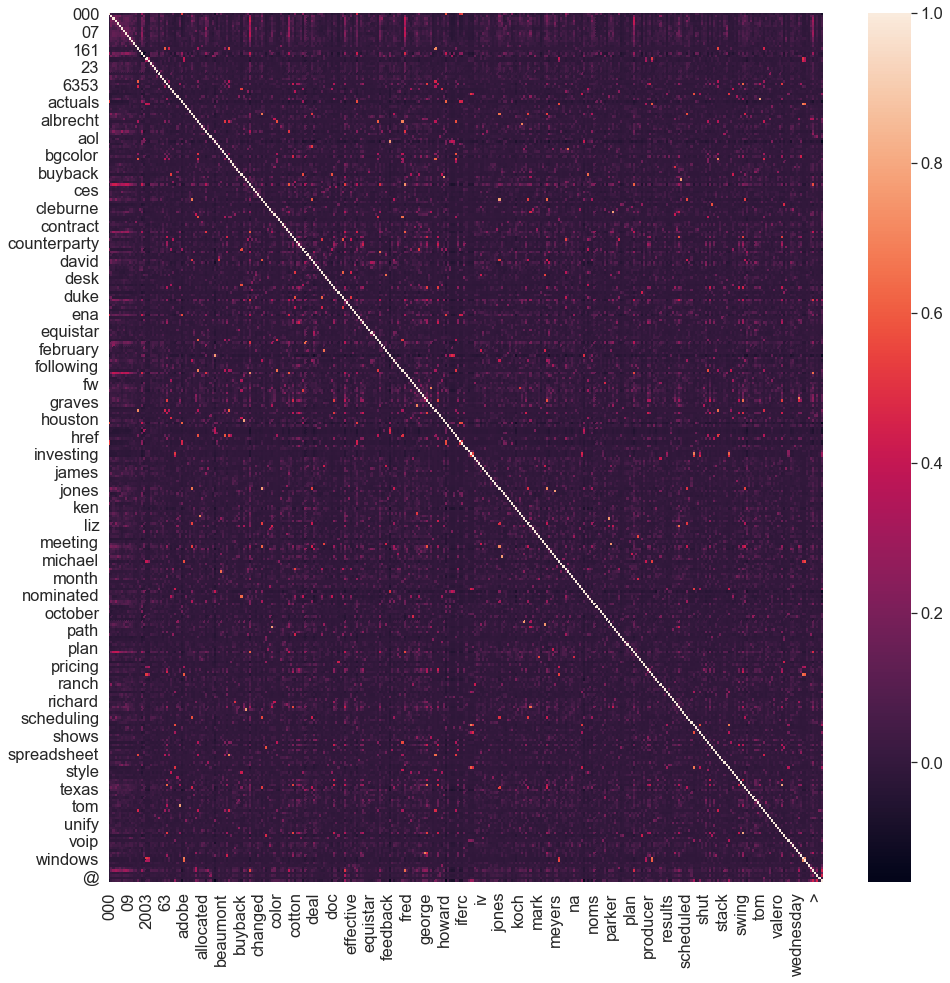

In [32]:
plt.figure(figsize=(16,16))
sns.heatmap(design.corr());

Looks like we have a sufficient amount of relationships! 

Now it's time to trains some classification models! :-)
- Logistic Regression

# Logistic Regression

First perform a train,test split

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(design, test_size=0.1, random_state=42)
y_train, y_test = emails1.loc[x_train.index].spam, emails1.loc[x_test.index].spam

Create the model & define a function for plotting the confusion matrix

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True, solver = 'lbfgs')
model = model.fit(x_train,y_train)
y_pred = model.predict(x_train)

In [35]:
def plot_confusion(cm):
    '''
    This function takes in a confusion matrix array and plots it 
    '''
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 


Compute the metrics on the training set

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3263
           1       0.99      0.97      0.98      1390

    accuracy                           0.99      4653
   macro avg       0.99      0.98      0.99      4653
weighted avg       0.99      0.99      0.99      4653

enropy loss: 0.400844768280028


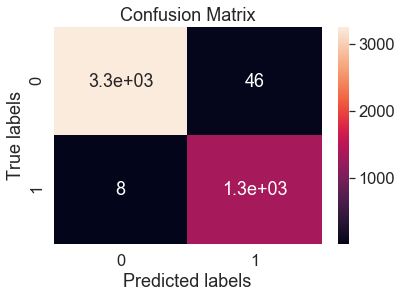

In [36]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, log_loss
cm_train = confusion_matrix(y_train , y_pred)
plot_confusion(cm_train)
print(classification_report(y_pred, y_train))
print('enropy loss:', log_loss(y_train, y_pred))

Let's adjust the threshold to see if we can do any better the antidiagonal sum is currently 54. The goal is to decrease this as much as possibke

In [65]:
model = LogisticRegression(fit_intercept=True, solver = 'lbfgs')
model = model.fit(x_train,y_train)
#y_pred = model.predict(x_train)
vals = []
thresh = np.arange(.4, .5, .01)
for t in thresh:
    y_pred = (model.predict_proba(x_train)[:, 1] > t) * 1
    cm_train = confusion_matrix(y_train , y_pred)
    vals.append((t, cm_train[0,1] + cm_train[1,0]))


best = min(vals, key = lambda t: t[1])
print('(threshold, minimum antidiagonal sum) = ',best)

(threshold, minimum antidiagonal sum) =  (0.4, 50)


The model performed very well on the training set. Let's perform cross validation to see how it might do on the test set.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def cv_metric(str,model):
    met = cross_val_score(model, x_train, y_train, scoring = str)
    return np.mean(met)

mets = ['accuracy', 'precision', 'recall', 'f1']
scores = []

for met in mets:
    scores.append(cv_metric(met,model))

metrics1 = pd.DataFrame(scores, index = mets)
metrics1    


,0
accuracy,0.973998
precision,0.935357
recall,0.978540
f1,0.956357


Each metric decreased, so there may be some overfitting. Let's try regularizing.

In [39]:
metrics1 = []

for c in np.arange(.05,1,.05):

    model = LogisticRegression(fit_intercept=True, solver = 'lbfgs', C = c)
    model = model.fit(x_train,y_train)
    mets = ['accuracy', 'precision', 'recall', 'f1']
    scores = []

    for met in mets:
        scores.append(cv_metric(met, model))

    metrics1.append(pd.DataFrame(scores, index = mets))
    
regs = pd.concat(metrics1, axis = 1).T
regs.columns = mets 
regs.index = np.arange(.05,1,.05)
regs.T
    

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
accuracy,0.972708,0.972923,0.973568,0.973782,0.974212,0.974212,0.974212,0.974427,0.975287,0.974642,0.974857,0.974642,0.974857,0.974642,0.974642,0.974213,0.974428,0.974428,0.974213
precision,0.925918,0.926596,0.929176,0.930398,0.931720,0.932999,0.932999,0.934212,0.936854,0.936129,0.936780,0.936121,0.936780,0.936717,0.936717,0.935408,0.936067,0.936067,0.936003
recall,0.985202,0.985202,0.984461,0.983720,0.983720,0.982239,0.982239,0.981498,0.981498,0.980016,0.980016,0.980016,0.980016,0.979278,0.979278,0.979278,0.979278,0.979278,0.978540
f1,0.954582,0.954934,0.955938,0.956237,0.956927,0.956874,0.956874,0.957171,0.958550,0.957450,0.957795,0.957452,0.957795,0.957421,0.957421,0.956733,0.957076,0.957076,0.956701


Looks like the regularization does not do much so I think the model is prepared for take off. Let's do it.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       365
           1       1.00      0.96      0.98       153

    accuracy                           0.99       518
   macro avg       0.99      0.98      0.99       518
weighted avg       0.99      0.99      0.99       518

enropy loss: 0.4000723087915941


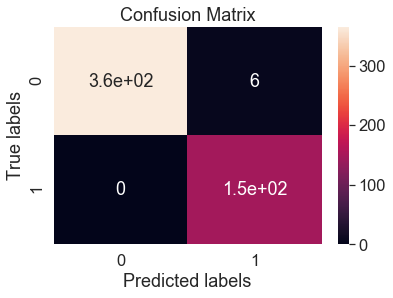

In [61]:
model = LogisticRegression(fit_intercept=True, solver = 'lbfgs')
model = model.fit(x_test,y_test)
#y_pred = model.predict(x_test) #threshold default is .5
y_pred = (model.predict_proba(x_test)[:, 1] > .4) * 1

cm_test = confusion_matrix(y_test , y_pred)
plot_confusion(cm_test)
print(classification_report(y_pred, y_test))
print('enropy loss:', log_loss(y_test, y_pred))

Are under the curve: 0.9919137466307278


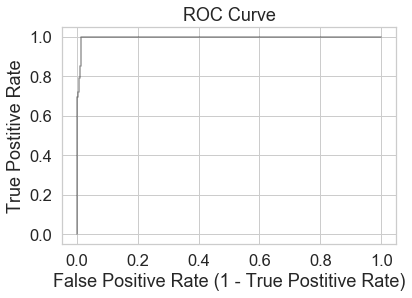

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_probabilities = model.predict_proba(x_test)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = roc_curve(y_test, model_probabilities, pos_label=1)
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
        
print('Are under the curve:', logit_roc_auc)
plt.plot(false_positive_rate_values, 
         sensitivity_values, 
         color='black', 
         alpha=0.4,
         label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.xlabel('False Positive Rate (1 - True Postitive Rate)')
plt.ylabel('True Postitive Rate')
plt.title('ROC Curve');
plt.show();


Excellent! :-)